In [26]:
import pandas as pd
import numpy as np

### データの読み込み

In [27]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [28]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [29]:
test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


### 学習データを特徴量と目的変数に分ける

In [30]:
train_x = train.drop(['rainfall'],axis=1)
train_y = train['rainfall']

test_x = test.copy()

### データを調べる

データの方の確認

In [31]:
train_x.dtypes
#objectの場合型が混在する

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object

In [32]:
train_x.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [33]:
print(train_x.describe())

                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39

ヒストグラムを分布で確認

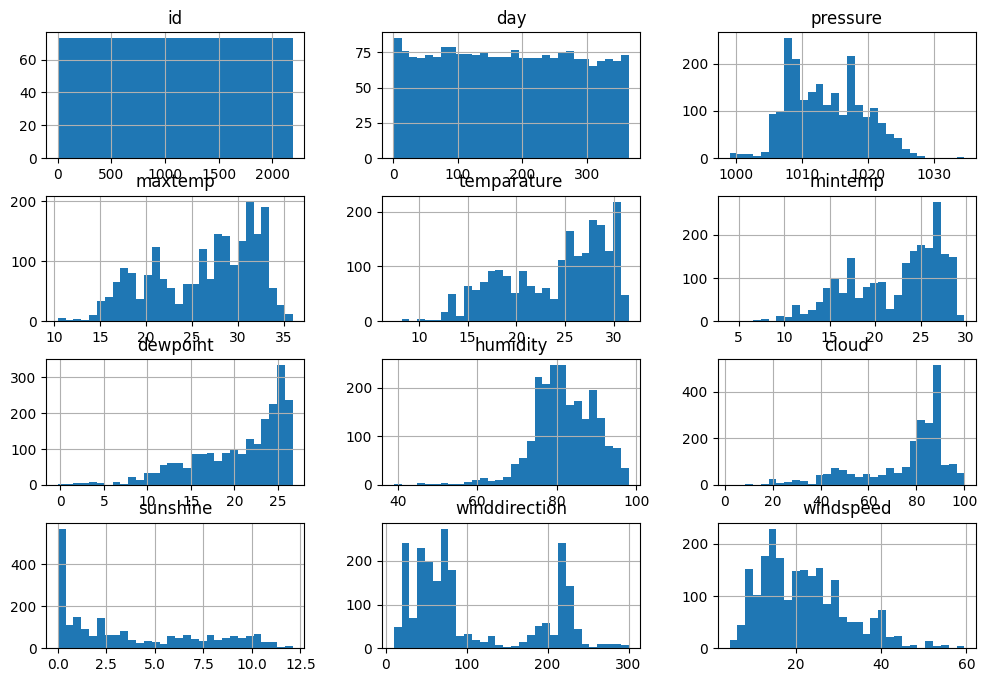

In [34]:
import matplotlib.pyplot as plt

train_x.hist(figsize=(12,8),bins=30)
plt.show()

### 変数の削除をする

In [35]:
# idの列は削除する
train_x = train_x.drop(['id'],axis=1)
test_x = test_x.drop(['id'],axis=1)

## 特徴量の作成

### 月の作成

In [36]:
"""
# 365日を対応する月に変換
train_x['date'] = pd.to_datetime(train_x['day'],format='%j') # %jは通し日
train_x['month'] = train_x['date'].dt.month # 月を習得
train_x = train_x.drop(columns=['date']) # 削除した

print(train_x[['day', 'month']].head())  # 確認
"""

"\n# 365日を対応する月に変換\ntrain_x['date'] = pd.to_datetime(train_x['day'],format='%j') # %jは通し日\ntrain_x['month'] = train_x['date'].dt.month # 月を習得\ntrain_x = train_x.drop(columns=['date']) # 削除した\n\nprint(train_x[['day', 'month']].head())  # 確認\n"

### 周期的な月の変換

In [37]:
train_x['day_sin'] = np.sin(2 * np.pi * train_x['day'] / 365)
train_x['day_cos'] = np.cos(2 * np.pi * train_x['day'] / 365)

test_x['day_sin'] = np.sin(2 * np.pi * test_x['day'] / 365)
test_x['day_cos'] = np.cos(2 * np.pi * test_x['day'] / 365)
print(train_x[['day','day_sin']].head())

   day   day_sin
0    1  0.017213
1    2  0.034422
2    3  0.051620
3    4  0.068802
4    5  0.085965


### 気温をmax<minとなっている列を欠損値とする

In [38]:
print(train_x[~(train_x['maxtemp'] > train_x['mintemp'])])
train_x.loc[train_x['maxtemp'] <= train_x['mintemp'], 'maxtemp'] = np.nan
test_x.loc[test_x['maxtemp'] <= test_x['mintemp'], 'maxtemp'] = np.nan

      day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
319   320    1018.9     19.2         20.9     19.2      19.4      78.0   38.0   
1051  322    1016.8     19.3         21.6     19.4      15.8      70.0   83.0   

      sunshine  winddirection  windspeed   day_sin   day_cos  
319        5.7           80.0       36.0 -0.699458  0.714673  
1051       0.0           50.0       33.2 -0.674444  0.738326  


### 気温>最高気温となっている列を欠損値とする

In [39]:
print(train_x[(train_x['temparature'] > train_x['maxtemp'])])
train_x.loc[train_x['maxtemp'] < train_x['temparature'], 'maxtemp'] = np.nan
test_x.loc[test_x['maxtemp'] < test_x['temparature'], 'maxtemp'] = np.nan

print(f"\n欠損値の個数:{train_x['maxtemp'].isnull().sum()}")

      day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
1       2    1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
12     13    1020.4     15.0         15.5     13.2      12.0      77.0   86.0   
369     5    1022.4     12.1         13.8     11.2       2.7      75.0   68.0   
398    34    1013.7     22.3         23.0     21.0      20.4      91.0   84.0   
653   289    1016.6     26.2         26.8     23.2      20.4      79.0   69.0   
702   338    1021.1     17.3         18.0     16.1      16.1      70.0   86.0   
734     5    1024.4     11.3         11.4     10.4       8.6      77.0   88.0   
796    67    1020.6     18.8         19.9     17.1      16.0      79.0   95.0   
1088  359    1025.9     17.5         18.0     16.5      13.3      79.0   89.0   
1104   10    1022.3     15.2         15.8     13.5      11.1      78.0   94.0   
1142   48    1013.3     17.1         17.2     15.2      14.8      87.0   90.0   
1146   52    1016.7     17.4

### 気温差

In [40]:
train_x['df_temp'] = train_x['maxtemp'] - train_x['mintemp']
test_x['df_temp'] = test_x['maxtemp'] - test_x['mintemp']

print(train_x[['maxtemp','mintemp','df_temp']])

      maxtemp  mintemp  df_temp
0        21.2     19.9      1.3
1         NaN     15.8      NaN
2        19.4     14.6      4.8
3        18.1     16.9      1.2
4        21.3     15.2      6.1
...       ...      ...      ...
2185     23.2     19.1      4.1
2186      NaN     16.3      NaN
2187     19.0     14.3      4.7
2188     16.4     13.8      2.6
2189     21.2     18.0      3.2

[2190 rows x 3 columns]


### 露点温度

In [41]:
"""
import numpy as np

# 露点温度を計算する関数
def calculate_dew_point(temp, humidity):
    return temp - ((100 - humidity) / 5) * (1 + 0.01 * temp)

# train_x['maxtemp']が欠損値の場合、train_x['temperature']を使用
train_x['dew_point'] = np.where(
    train_x['maxtemp'].isnull(),
    calculate_dew_point(train_x['temparature'], train_x['humidity']),
    calculate_dew_point(train_x['maxtemp'], train_x['humidity'])
)

# 露点温度の結果を確認
print(train_x[['maxtemp', 'temparature', 'humidity', 'dew_point']].head())
"""


"\nimport numpy as np\n\n# 露点温度を計算する関数\ndef calculate_dew_point(temp, humidity):\n    return temp - ((100 - humidity) / 5) * (1 + 0.01 * temp)\n\n# train_x['maxtemp']が欠損値の場合、train_x['temperature']を使用\ntrain_x['dew_point'] = np.where(\n    train_x['maxtemp'].isnull(),\n    calculate_dew_point(train_x['temparature'], train_x['humidity']),\n    calculate_dew_point(train_x['maxtemp'], train_x['humidity'])\n)\n\n# 露点温度の結果を確認\nprint(train_x[['maxtemp', 'temparature', 'humidity', 'dew_point']].head())\n"

In [42]:
train_x

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,day_sin,day_cos,df_temp
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1.721336e-02,0.999852,1.3
1,2,1019.5,NaN,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,3.442161e-02,0.999407,NaN
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,5.161967e-02,0.998667,4.8
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,6.880243e-02,0.997630,1.2
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,8.596480e-02,0.996298,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,-6.880243e-02,0.997630,4.1
2186,362,1012.4,NaN,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,-5.161967e-02,0.998667,NaN
2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,-3.442161e-02,0.999407,4.7
2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,-1.721336e-02,0.999852,2.6


### 最低温度<露点温度

In [43]:
train_x['mintemp_dewpoint'] = train_x['temparature'] < train_x['mintemp']
train_x['mintemp_dewpoint'] = train_x['mintemp_dewpoint'].astype(int)

test_x['mintemp_dewpoint'] = test_x['temparature'] < test_x['mintemp']
test_x['mintemp_dewpoint'] = test_x['mintemp_dewpoint'].astype(int)


# 結果を確認
print(train_x[['temparature', 'mintemp', 'mintemp_dewpoint']].head())

   temparature  mintemp  mintemp_dewpoint
0         20.6     19.9                 0
1         16.9     15.8                 0
2         16.1     14.6                 0
3         17.8     16.9                 0
4         18.4     15.2                 0


In [44]:
train_x

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,day_sin,day_cos,df_temp,mintemp_dewpoint
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1.721336e-02,0.999852,1.3,0
1,2,1019.5,NaN,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,3.442161e-02,0.999407,NaN,0
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,5.161967e-02,0.998667,4.8,0
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,6.880243e-02,0.997630,1.2,0
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,8.596480e-02,0.996298,6.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,-6.880243e-02,0.997630,4.1,0
2186,362,1012.4,NaN,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,-5.161967e-02,0.998667,NaN,0
2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,-3.442161e-02,0.999407,4.7,0
2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,-1.721336e-02,0.999852,2.6,0


In [45]:
#変数を削除する
train_x = train_x.drop(['day'],axis=1)
test_x = test_x.drop(['day'],axis=1)

## モデルの作成

In [46]:
#"""
import optuna
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import log_loss

# ランダムシードを設定
np.random.seed(71)  # NumPyの乱数シード
import random
random.seed(71)  # Pythonのランダムシード

# 目的関数（評価指標: log_loss）
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 2000),
        'gamma': trial.suggest_float('gamma', 0, 20),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 20),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 20),
        'random_state': 71,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    # モデルの定義
    model = xgb.XGBClassifier(**params, n_jobs=-1)

    # 5分割クロスバリデーションで評価
    score = cross_val_score(model, train_x, train_y, scoring='neg_log_loss', cv=5, n_jobs=-1)
    
    return -1.0 * np.mean(score)  # log_loss は小さい方が良いので符号を反転

# Optuna でベイズ最適化
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)  # 試行回数を500に増加

# 最適なパラメータ
best_params = study.best_params
print(f'最適なパラメータ: {best_params}')
#"""

[I 2025-03-03 05:31:40,791] A new study created in memory with name: no-name-b0cacfb9-a30b-4179-9fe0-55090d0b5722
/opt/homebrew/var/pyenv/versions/3.12.6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [05:31:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/var/pyenv/versions/3.12.6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [05:31:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/var/pyenv/versions/3.12.6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [05:31:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/var/pyenv/versions/3.12.6/lib/python3.12/site-packages/xgboost/core.py:158: U

最適なパラメータ: {'max_depth': 6, 'min_child_weight': 1, 'learning_rate': 0.1964120643404846, 'subsample': 0.698635423786005, 'colsample_bytree': 0.7511648532253296, 'n_estimators': 708, 'gamma': 7.67032644783225, 'reg_alpha': 0.03355845378040004, 'reg_lambda': 3.850985263916497}


In [47]:
#"""
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, confusion_matrix

# モデルの作成と学習
model = xgb.XGBClassifier(**best_params, n_jobs=-1)
model.fit(train_x, train_y)

# テストデータで評価
y_pred_prob = model.predict_proba(train_x)  # 確率予測
logloss = log_loss(train_y, y_pred_prob)  # log_lossを計算

# 予測ラベルを取得
y_pred_label = model.predict(train_x)

# 正当率（accuracy）の計算
accuracy = accuracy_score(train_y, y_pred_label)

# その他の評価指標
precision = precision_score(train_y, y_pred_label, average='weighted')  # クラスごとに重み付き適合率
recall = recall_score(train_y, y_pred_label, average='weighted')  # クラスごとに重み付き再現率
f1 = f1_score(train_y, y_pred_label, average='weighted')  # クラスごとに重み付きF1スコア
conf_matrix = confusion_matrix(train_y, y_pred_label)  # 混同行列

# 結果を表示
print(f'Test Log Loss: {logloss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
#"""


Test Log Loss: 0.3103
Test Accuracy: 0.8790
Test Precision: 0.8757
Test Recall: 0.8790
Test F1 Score: 0.8764
Confusion Matrix:
[[ 376  164]
 [ 101 1549]]


In [48]:
# train_xの各列のデータ型を確認
print(train_x.dtypes)

# 数値に変換できない列を適切に処理
# 例えば、カテゴリカルな列をOneHotエンコーディングするなど
train_x = pd.get_dummies(train_x, drop_first=True)  # カテゴリカル変数をダミー変数に変換


pressure            float64
maxtemp             float64
temparature         float64
mintemp             float64
dewpoint            float64
humidity            float64
cloud               float64
sunshine            float64
winddirection       float64
windspeed           float64
day_sin             float64
day_cos             float64
df_temp             float64
mintemp_dewpoint      int64
dtype: object


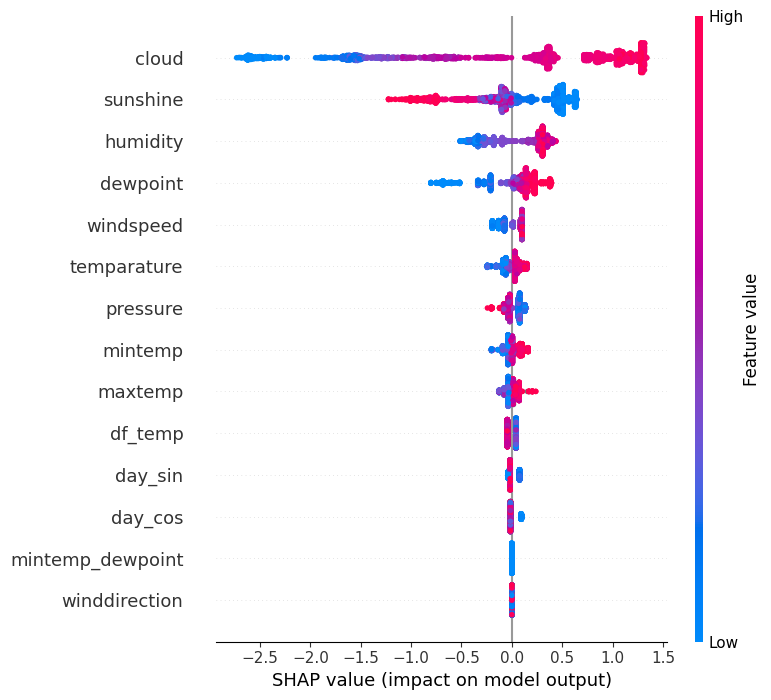

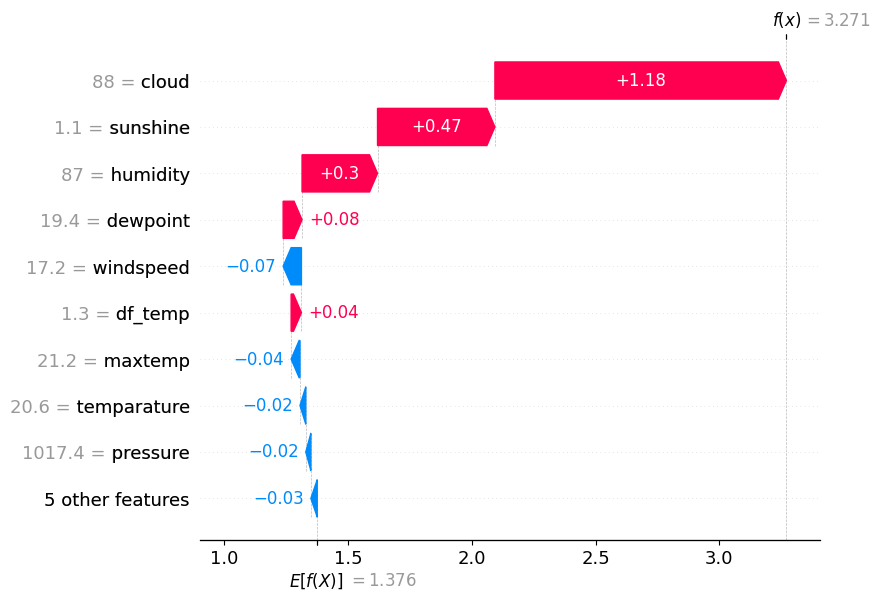

In [49]:
#""""
import shap
import matplotlib.pyplot as plt

# SHAPのExplainerを作成
explainer = shap.Explainer(model, train_x)

# SHAP値を計算
shap_values = explainer(train_x)

# 特徴量の重要度を可視化（サマリープロット）
shap.summary_plot(shap_values, train_x)

# 特定のサンプルについてSHAPの力価プロットを表示（例: 0番目のデータ）
shap.plots.waterfall(shap_values[0])
#"""

In [50]:
#"""
from sklearn.metrics import accuracy_score
model.fit(train_x, train_y)

# テストデータの予測確率を取得
pred_prob = model.predict_proba(test_x)[:, 1]

# 最適なしきい値を使用して予測値を二値に変換
#pred_label = np.where(pred_prob > best_threshold, 1, 0)
pred_label = np.where(pred_prob > 0.5, 1, 0)

# 提出用ファイルの作成
submission = pd.DataFrame({
    'id': test['id'], 
    'rainfall': pred_label
})

# 出力確認
print(submission)

# best['Survived']とpred_labelの1の数を比較
print("予測結果pred_labelの1の数:", pred_label.sum())
#"""

       id  rainfall
0    2190         1
1    2191         1
2    2192         1
3    2193         0
4    2194         0
..    ...       ...
725  2915         1
726  2916         1
727  2917         1
728  2918         1
729  2919         1

[730 rows x 2 columns]
予測結果pred_labelの1の数: 574


In [51]:
# 提出用ファイルの保存（例: 'submission.csv'）
#submission.to_csv('submit/submission_3.csv', index=False)